# K-Nearest Neighbors Regression
Shaney Flores

For this project, we will implement a K-NN regression model to estimate the location of several test points. We will use several different numbers of nearest neighbors, K, as well as several different weight measurements for the regression. The output of each model will be plotted with both the data and estimates shown in light blue and red, respectively.

We will first draw 100 data points between 1 and 10 from a uniform distribution. These will serve as our X coordinates. Y coordinates will be calculated as the natural log of our X coordinates plus a noise value derived from a Gaussian distribution. For the test points, we will use X = 1, 3, 5, 7, and 9.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
seed = 32
rng = np.random.default_rng(seed)

N = 100
lb = 1.0
ub = 10.0
X = rng.uniform(low=lb, high=ub, size=(N,1))

y = np.log(X) + rng.normal(size=(N,1))
x_test = np.arange(start=lb, stop=ub, step=2).reshape(-1,1)
x_axis = np.linspace(1.0,10.0,1000).reshape(-1,1)

We will next define several functions to help us with our K-NN regression estimates. The first function will calculate weight values using the Gaussian kernel. The second will calculate and plot the regression model.

In [2]:
"""
Apply Gaussian (RBF) Kernel
"""
def gauss_kernel(distance):
    return np.exp(-0.5 * distance**2)


"""
Perform K-NN regression

K       : number of nearest neighbors
x_train : x values of training data
y_train : y values of training data
x_test  : x values of test data
wght    : kernel function
x_reg   : x values to plot regression line
"""
def knn_reg(K, x_train, y_train, x_test, wght, x_reg=None):
    if wght == "gaussian":
        knn = neighbors.KNeighborsRegressor(n_neighbors = K, weights = gauss_kernel).fit(x_train, y_train)
    else:
        knn = neighbors.KNeighborsRegressor(n_neighbors = K, weights = wght).fit(x_train, y_train)
    y_hat = knn.predict( x_test )
    
    ## print out x_test and y_hat pairs
    print( np.squeeze(np.stack((x_test, y_hat), axis=-1), axis=1) ) 
    
    ## find the closest X point (x_prime), and associated y (y_prime), to each of our test points (x)
    closest_points = np.argmin( np.linalg.norm(x_train.reshape(N,1,1) - x_test.reshape(1,1,-1), axis=1), axis=0)
    x_prime = x_train[closest_points]
    y_prime = y_train[closest_points]
    
    ## plot data and estimates from KNN regression
    #plt.scatter(x_train, y_train, color="lightskyblue", label="data"    , zorder=2)
    plt.scatter(x_prime, y_prime, color="lightskyblue", label="data"    , zorder=2, s=18.)
    plt.scatter(x_test , y_hat  , color="red"         , label="estimate", zorder=2, s=18.)
    
    ## option to add a regression line to the plot
    if x_reg is not None:
        y_reg = knn.predict( x_reg )
        plt.plot(x_reg , y_reg  , color="lightgrey"   , label="regression", zorder=1)
    
    plt.ylim([-0.5,5.5])
    plt.title("'%s' weights (k = %i)" % (wght, K))
    plt.legend()
    plt.show()
    

### Uniform Weights

For the first set of K-NN regressions, we will slowly increase the K value and apply a uniform kernel where each K nearest neighbor contributes equally to the weight.

#### K = 1

[[ 1.         -0.31565594]
 [ 3.          2.64186953]
 [ 5.          0.8072378 ]
 [ 7.          0.24467215]
 [ 9.          2.30720157]]


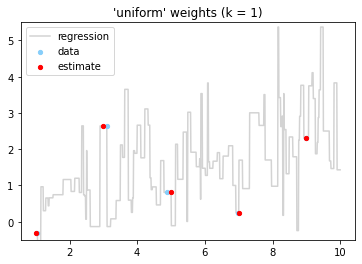

In [3]:
knn_reg(1, X, y, x_test, 'uniform', x_axis)

#### K = 3

[[1.         0.02565865]
 [3.         0.86185669]
 [5.         0.94467078]
 [7.         0.9811196 ]
 [9.         3.27301189]]


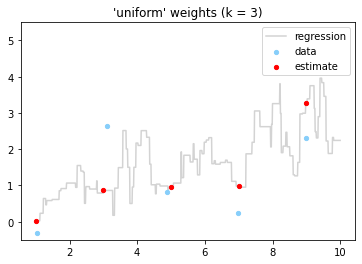

In [4]:
knn_reg(3, X, y, x_test, 'uniform', x_axis)

#### K = 50

[[1.         1.1976399 ]
 [3.         1.1976399 ]
 [5.         1.52539751]
 [7.         2.05730373]
 [9.         2.31700826]]


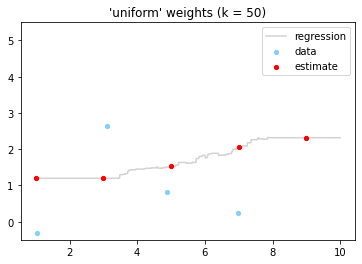

In [5]:
knn_reg(50, X, y, x_test, 'uniform', x_axis)

### Weights Proportional to the Inverse of the Distance

For the next set of K-NN regressions, we will switch the kernel so that the K nearest neighbors have an influence that is inversely proportional to the distance from the test points.

#### K = 1

[[ 1.         -0.31565594]
 [ 3.          2.64186953]
 [ 5.          0.8072378 ]
 [ 7.          0.24467215]
 [ 9.          2.30720157]]


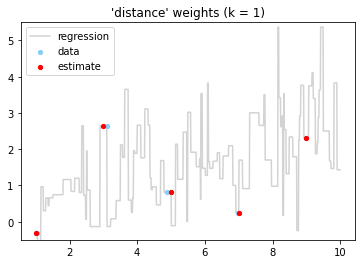

In [6]:
knn_reg(1, X, y, x_test, 'distance', x_axis)

#### K = 3

[[ 1.         -0.27145493]
 [ 3.          1.16162529]
 [ 5.          0.92768252]
 [ 7.          0.81261566]
 [ 9.          2.51559006]]


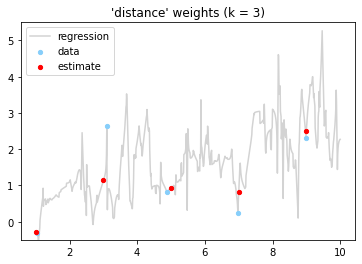

In [7]:
knn_reg(3, X, y, x_test, 'distance', x_axis)

#### K = 50

[[1.         0.14396754]
 [3.         1.17135394]
 [5.         1.37434269]
 [7.         1.31103616]
 [9.         2.50564283]]


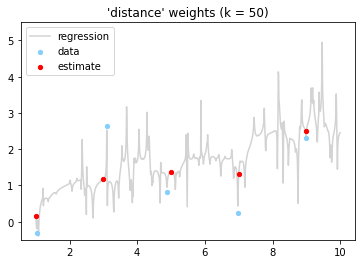

In [8]:
knn_reg(50, X, y, x_test, 'distance', x_axis)

### All Data Contribute to the Weights

Finally, we will apply a Gaussian kernel to the data using all data points.

[[1.         0.62651002]
 [3.         1.20184033]
 [5.         1.5708016 ]
 [7.         1.95712227]
 [9.         2.59026106]]


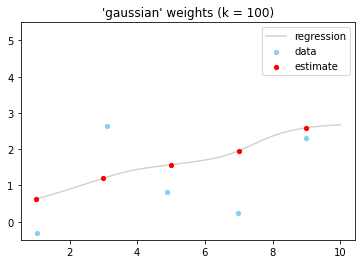

In [9]:
knn_reg(len(X), X, y, x_test, 'gaussian', x_axis)